**Langkah 1: Menyusun Data Siswa**

Data siswa disusun dalam bentuk list of dictionaries di mana setiap dictionary mewakili satu Siswa dan atributnya:

Matematika, Fisika dan Kimia

In [2]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import matplotlib.pyplot as plt
from scipy.spatial.distance import cityblock

# Data siswa yang diperbarui
data = {
    'Siswa': ['A', 'B', 'C', 'D', 'E'],
    'Matematika': [82, 76, 90, 85, 78],
    'Fisika': [88, 70, 92, 80, 85],
    'Kimia': [90, 80, 85, 75, 95]
}

# Membuat DataFrame
df = pd.DataFrame(data)

print(df)

  Siswa  Matematika  Fisika  Kimia
0     A          82      88     90
1     B          76      70     80
2     C          90      92     85
3     D          85      80     75
4     E          78      85     95


**Langkah 2: Menghitung Jarak**

Hitung jarak antara setiap pasangan individu menggunakan **Manhattan distance** kemudian membuat **Matriks Jarak**

In [3]:
# Menghapus kolom 'Siswa' untuk perhitungan jarak
values = df[['Matematika', 'Fisika', 'Kimia']].values

# Menghitung jarak antar siswa menggunakan Manhattan Distance
distances = pd.DataFrame(np.zeros((len(df), len(df))), index=df['Siswa'], columns=df['Siswa'])

for i in range(len(values)):
    for j in range(len(values)):
        distances.iloc[i, j] = cityblock(values[i], values[j])

print("Jarak antara siswa (Manhattan Distance):")
print(distances)

Jarak antara siswa (Manhattan Distance):
Siswa     A     B     C     D     E
Siswa                              
A       0.0  34.0  17.0  26.0  12.0
B      34.0   0.0  41.0  24.0  32.0
C      17.0  41.0   0.0  27.0  29.0
D      26.0  24.0  27.0   0.0  32.0
E      12.0  32.0  29.0  32.0   0.0


**Langkah 3: Clustering dan Visualisasi**

Gunakan metode linkage untuk melakukan clustering berdasarkan jarak yang telah dihitung menggunakan metode **average linkage**.

Visualisasikan hasil clustering menggunakan dendrogram untuk melihat struktur hierarkis dari clustering. Visualisasikan hasil clustering menggunakan dendrogram untuk melihat struktur hierarkis dari clustering.

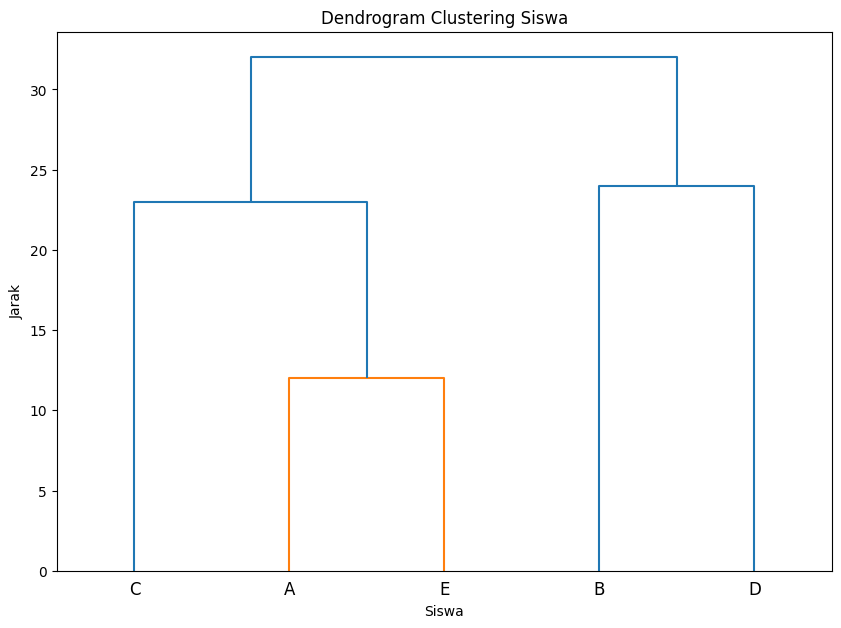

In [4]:

# Melakukan clustering dengan Average Linkage
linked = linkage(values, method='average', metric='cityblock')

# Membuat dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram Clustering Siswa")
plt.xlabel("Siswa")
plt.ylabel("Jarak")
plt.xticks(range(len(df)), df['Siswa'])
dendrogram(linked, labels=df['Siswa'].values, orientation='top', leaf_font_size=12)
plt.show()


Langkah 4: **Menentukan Cluster**

Tentukan jumlah cluster yang diinginkan menggunakan  **Dendogram Cut** untuk menentukan jumlah cluster

Masukkan Treshold: 20


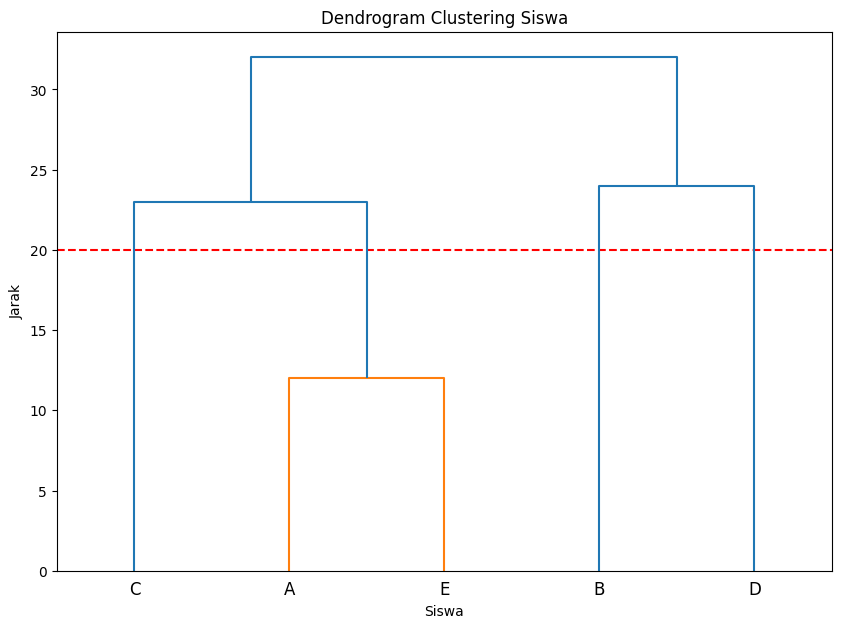


Hasil Clustering:
  Siswa  Matematika  Fisika  Kimia  Cluster
0     A          82      88     90        1
1     B          76      70     80        3
2     C          90      92     85        2
3     D          85      80     75        4
4     E          78      85     95        1


In [6]:
a = int(input("Masukkan Treshold: "))

plt.figure(figsize=(10, 7))
plt.title("Dendrogram Clustering Siswa")
plt.xlabel("Siswa")
plt.ylabel("Jarak")
plt.xticks(range(len(df)), df['Siswa'])
plt.axhline(y=a, color='r', linestyle='--')  # Menentukan threshold
dendrogram(linked, labels=df['Siswa'].values, orientation='top', leaf_font_size=12)
plt.show()

# Menentukan jumlah cluster (misalnya 2)
clusters = fcluster(linked, t=a, criterion='distance')

# Menambahkan hasil clustering ke DataFrame
df['Cluster'] = clusters

print("\nHasil Clustering:")
print(df)
